# 3.2 Classification and regression with a two-layer perceptron

## 3.2.1 Classification of linearly non-separable data

We start by defining the two-layer perceptron class.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
def mse(predictions, targets):
    return np.mean((predictions-targets)**2)

In [3]:
def accuracy(predictions, targets):
    return len(predictions[(np.sign(predictions) == np.sign(targets))]) / len(targets)

In [4]:
class TwoLayerPerceptron:
    
    def __init__(self, input_dims, output_dims, num_hidden_nodes=5, alpha=0.9, learning_rate=0.001):
        self.hidden_nodes = num_hidden_nodes
        self.w = np.random.normal(0,1,(num_hidden_nodes, input_dims+1))
        self.v = np.random.normal(0,1,(output_dims,self.hidden_nodes+1))
        self.alpha = alpha
        self.learning_rate = learning_rate
        self.dw = 0
        self.dv = 0
        
    def backprop(self, data, targets):
        # Forward pass
        ones = np.ones((1, data.shape[1]))
        data = np.concatenate((data, ones), axis=0)
        
        hin = np.dot(self.w, data)
        hout = 2 / (1 + np.exp(-hin)) - 1
        ones = np.ones((1, hout.shape[1]))
        hout = np.concatenate((hout, ones), axis=0)
            
        oin = np.dot(self.v, hout)
        out = 2 / (1 + np.exp(-oin)) - 1

        # Backward pass
        delta_o = (out - targets) * ((1 + out) *  (1 - out)) * 0.5
        delta_h = (np.dot(np.transpose(self.v),delta_o)) * ((1 + hout) * (1 - hout)) * 0.5
        delta_h = delta_h[:self.hidden_nodes,:]
        
        # Weight update
        self.dw = (self.dw * self.alpha) - np.dot(delta_h, np.transpose(data)) * (1 - self.alpha)
        self.dv = (self.dv * self.alpha) - np.dot(delta_o, np.transpose(hout)) * (1 - self.alpha)
        self.w = self.w + self.dw * self.learning_rate
        self.v = self.v + self.dv * self.learning_rate
        
    def train(self, data, targets, sequential=False, epochs=100):
        for epoch in range(epochs):
            if not sequential:
                self.backprop(data, targets)
            else:
                for sample in range(data.shape[1]):
                    singleData = np.reshape(data[:, sample], (data.shape[0], 1))
                    self.backprop(singleData, [targets[sample]])

            
    def predict(self, data):
        ones = np.ones((1, data.shape[1]))
        data = np.concatenate((data, ones), axis=0)
        
        hin = np.dot(self.w, data)
        hout = 2 / (1 + np.exp(-hin)) - 1
        ones = np.ones((1, hout.shape[1]))
        hout = np.concatenate((hout, ones), axis=0)
            
        oin = np.dot(self.v, hout)
        out = 2 / (1 + np.exp(-oin)) - 1
        return out
    
    def trainAndPredict(self, trainingData, trainingTargets, testData, testTargets, sequential=False, epochs=100):
        test_errors = []
        test_accuracies = []
        train_errors = []
        train_accuracies = []
    
        # Epoch 0
        predictions = np.sign(self.predict(testData))[0]
        test_errors += [mse(predictions,testTargets)]
        test_accuracies += [accuracy(predictions, testTargets)]
        predictions = np.sign(self.predict(trainingData))[0]
        train_errors += [mse(predictions,trainingTargets)]
        train_accuracies += [accuracy(predictions, trainingTargets)]
        for epoch in range(epochs):
            if not sequential:
                self.backprop(trainingData, trainingTargets)
            else:
                for sample in range(data.shape[1]):
                    singleData = np.reshape(data[:, sample], (data.shape[0], 1))
                    self.backprop(singleData, [targets[sample]])
                    
            predictions = np.sign(self.predict(testData))[0]
            test_errors += [mse(predictions,testTargets)]
            test_accuracies += [accuracy(predictions, testTargets)]
            predictions = np.sign(self.predict(trainingData))[0]
            train_errors += [mse(predictions, trainingTargets)]
            train_accuracies += [accuracy(predictions, trainingTargets)]
        
        return [i for i in range(epochs+1)], test_errors, test_accuracies, train_errors, train_accuracies

We will be studying the problem of linearnly non-separable patterns (same as 3.1.3).

In [60]:
n = 100
mA = [1.0, 0.3]
sigmaA = 0.2
mB = [0.0, -0.1]
sigmaB = 0.3
classA = np.ndarray(shape=(2,n))
classB = np.ndarray(shape=(2,n))
classA[0,:] = np.concatenate((np.random.normal(0,1,(1,int(0.5*n))) * sigmaA - mA[0], np.random.normal(0,1,(1,int(0.5*n))) * sigmaA + mA[0]), axis=1) 
classB[0,:] = np.random.normal(0,1,(1,n)) + sigmaB + mB[0]
classA[1,:] = np.random.normal(0,1,(1,n)) * sigmaA + mA[1]
classB[1,:] = np.random.normal(0,1,(1,n)) * sigmaB + mB[1]
data = np.concatenate((classA, classB), axis=1)
targets = np.array([1 for i in range(n)] + [-1 for i in range(n)])

**Question 1: Performance vs number of hidden nodes**

In [6]:
mean_errors = []
mean_accuracies = []
errors_stds = []
accuracies_stds = []
x = [i for i in range(1,100)]
for i in range(1,100):
    errors = []
    accuracies = []
    for j in range(50):
        model = TwoLayerPerceptron(2, 1, num_hidden_nodes=i)
        model.train(data, targets, epochs=1000)
        predictions = np.sign(model.predict(data))[0]
        errors += [mse(predictions,targets)]
        accuracies += [accuracy(predictions, targets)]
    mean_errors += [np.mean(errors)]
    mean_accuracies += [np.mean(accuracies)]
    errors_stds += [np.std(errors)]
    accuracies_stds += [np.std(accuracies)]

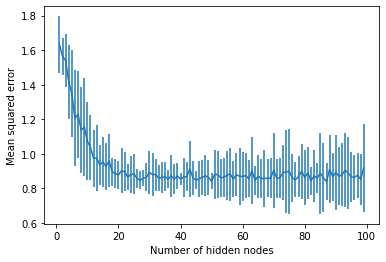

In [7]:
plt.errorbar(x, mean_errors, errors_stds)
plt.xlabel("Number of hidden nodes")
plt.ylabel("Mean squared error")
plt.show()

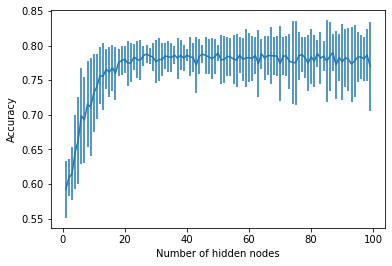

In [8]:
plt.errorbar(x, mean_accuracies, accuracies_stds)
plt.xlabel("Number of hidden nodes")
plt.ylabel("Accuracy")
plt.show()

**Question 2**

For this question, we need to split the dataset into training and validation sets.

First scenario: random 25% from each class are removed

In [61]:
classA = np.transpose(classA)
classB = np.transpose(classB)
np.random.shuffle(classA)
np.random.shuffle(classB)
classA = np.transpose(classA)
classB = np.transpose(classB)

In [62]:
classAtrain = classA[:,:int(0.75*n)]
classBtrain = classB[:,:int(0.75*n)]
sc1patternsTrain = np.concatenate((classAtrain, classBtrain), axis=1)
sc1targetsTrain = np.concatenate((np.ones(classAtrain.shape[1]), -np.ones(classBtrain.shape[1])))

classAtest = classA[:,int(0.75*n):]
classBtest = classB[:,int(0.75*n):]
sc1patternsTest = np.concatenate((classAtest, classBtest), axis=1)
sc1targetsTest = np.concatenate((np.ones(classAtest.shape[1]), -np.ones(classBtest.shape[1])))

Second scenario: random 50% from classA are removed

In [63]:
classAtrain = classA[:,:int(0.5*n)]
classBtrain = classB[:,:int(1*n)]
sc2patternsTrain = np.concatenate((classAtrain, classBtrain), axis=1)
sc2targetsTrain = np.concatenate((np.ones(classAtrain.shape[1]), -np.ones(classBtrain.shape[1])))

classAtest = classA[:,int(0.5*n):]
classBtest = classB[:,int(1*n):]
sc2patternsTest = np.concatenate((classAtest, classBtest), axis=1)
sc2targetsTest = np.concatenate((np.ones(classAtest.shape[1]), -np.ones(classBtest.shape[1])))

Third scenario: random 50% from classB are removed

In [64]:
classAtrain = classA[:,:int(1*n)]
classBtrain = classB[:,:int(0.5*n)]
sc3patternsTrain = np.concatenate((classAtrain, classBtrain), axis=1)
sc3targetsTrain = np.concatenate((np.ones(classAtrain.shape[1]), -np.ones(classBtrain.shape[1])))

classAtest = classA[:,int(1*n):]
classBtest = classB[:,int(0.5*n):]
sc3patternsTest = np.concatenate((classAtest, classBtest), axis=1)
sc3targetsTest = np.concatenate((np.ones(classAtest.shape[1]), -np.ones(classBtest.shape[1])))

Fourth scenario: 20% from a subset of classA for which classA(1,:)<0 and 80% from a subset of classA for which classA(1,:)>0

In [65]:
classAa = classA[:,classA[0,:] < 0]
classAb = classA[:,classA[0,:] >= 0]

classAtrain = np.concatenate((classAa[:,:int(0.8*classAa.shape[1])], classAb[:,:int(0.2*classAb.shape[1])]), axis=1)
classBtrain = classB[:,:int(1*n)]
sc4patternsTrain = np.concatenate((classAtrain, classBtrain), axis=1)
sc4targetsTrain = np.concatenate((np.ones(classAtrain.shape[1]), -np.ones(classBtrain.shape[1])))

classAtest = np.concatenate((classAa[:,int(0.8*classAa.shape[1]):], classAb[:,int(0.2*classAb.shape[1]):]), axis=1)
classBtest = classB[:,int(1*n):]
sc4patternsTest = np.concatenate((classAtest, classBtest), axis=1)
sc4targetsTest = np.concatenate((np.ones(classAtest.shape[1]), -np.ones(classBtest.shape[1])))

**Question 2.1 & 2.2: learning/error curves for learning and training sets using different scenarios and number of hidden nodes**

In [66]:
def learning_curves(patternsTrain, targetsTrain, patternsTest, targetsTest, hidden_nodes=50, sequential=False):
    epochs = 1000

    x = []
    test_errors = np.ndarray(shape=(50,1,epochs+1))
    test_accuracies = np.ndarray(shape=(50,1,epochs+1))
    train_errors = np.ndarray(shape=(50,1,epochs+1))
    train_accuracies = np.ndarray(shape=(50,1,epochs+1))
    for i in range(50):
        model = TwoLayerPerceptron(2, 1, num_hidden_nodes=hidden_nodes)
        x, etest, atest, etrain, atrain = model.trainAndPredict(patternsTrain, targetsTrain, patternsTest, targetsTest, epochs=epochs, sequential=sequential)
        x = x
        test_errors[i,0,:] = etest
        test_accuracies[i,0,:] = atest
        train_errors[i,0,:] = etrain
        train_accuracies[i,0,:] = atrain

    mean_test_errors = []
    mean_test_accuracies = []
    mean_train_errors = []
    mean_train_accuracies = []    
    stds_test_errors = []
    stds_test_accuracies = []
    stds_train_errors = []
    stds_train_accuracies = []
    for i in range(epochs+1):
        mean_test_errors += [np.mean(test_errors[:,0,i])]
        stds_test_errors += [np.std(test_errors[:,0,i])]
        mean_test_accuracies += [np.mean(test_accuracies[:,0,i])]
        stds_test_accuracies += [np.std(test_accuracies[:,0,i])]
        mean_train_errors += [np.mean(train_errors[:,0,i])]
        stds_train_errors += [np.std(train_errors[:,0,i])]
        mean_train_accuracies += [np.mean(train_accuracies[:,0,i])]
        stds_train_accuracies += [np.std(train_accuracies[:,0,i])]
        
    return x, mean_test_errors, mean_test_accuracies, mean_train_errors, mean_train_accuracies #, stds_test_errors, stds_test_accuracies, stds_train_errors, stds_train_accuracies

In [67]:
def plot_error_curve(x, mean_test_errors, mean_train_errors, title):
    plt.plot(x, mean_test_errors, label="Test set")
    plt.plot(x, mean_train_errors, label="Training set")
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("Mean squared error")
    plt.legend()
    plt.show()

In [68]:
def plot_accuracy_curve(x, mean_test_accuracies, mean_train_accuracies, title):
    plt.plot(x, mean_test_accuracies, label="Test set")
    plt.plot(x, mean_train_accuracies, label="Training set")
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

First scenario: random 25% from each class are removed

In [69]:
x, mean_test_errors, mean_test_accuracies, mean_train_errors, mean_train_accuracies = \
learning_curves(sc1patternsTrain, sc1targetsTrain, sc1patternsTest, sc1targetsTest, 10)

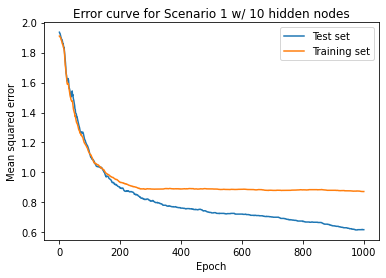

In [70]:
plot_error_curve(x, mean_test_errors, mean_train_errors, "Error curve for Scenario 1 w/ 10 hidden nodes")

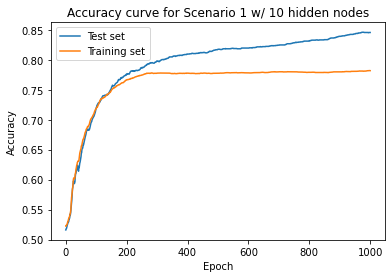

In [71]:
plot_accuracy_curve(x, mean_test_accuracies, mean_train_accuracies, "Accuracy curve for Scenario 1 w/ 10 hidden nodes")

In [72]:
x, mean_test_errors, mean_test_accuracies, mean_train_errors, mean_train_accuracies = \
learning_curves(sc1patternsTrain, sc1targetsTrain, sc1patternsTest, sc1targetsTest, 20)

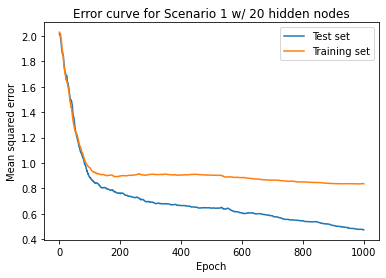

In [73]:
plot_error_curve(x, mean_test_errors, mean_train_errors, "Error curve for Scenario 1 w/ 20 hidden nodes")

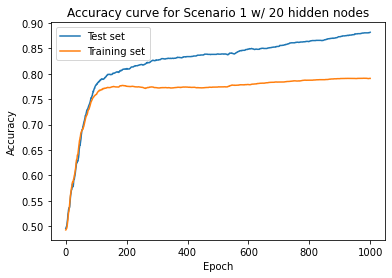

In [74]:
plot_accuracy_curve(x, mean_test_accuracies, mean_train_accuracies, "Accuracy curve for Scenario 1 w/ 20 hidden nodes")

In [75]:
x, mean_test_errors, mean_test_accuracies, mean_train_errors, mean_train_accuracies = \
learning_curves(sc1patternsTrain, sc1targetsTrain, sc1patternsTest, sc1targetsTest, 50)

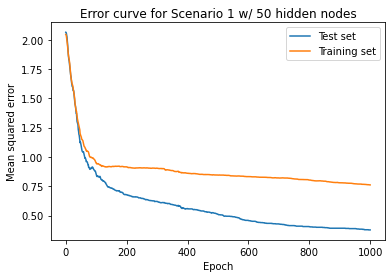

In [76]:
plot_error_curve(x, mean_test_errors, mean_train_errors, "Error curve for Scenario 1 w/ 50 hidden nodes")

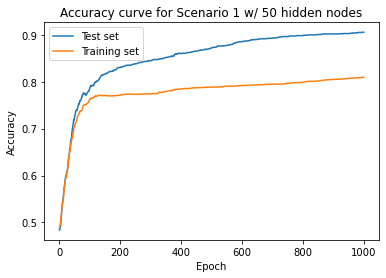

In [77]:
plot_accuracy_curve(x, mean_test_accuracies, mean_train_accuracies, "Accuracy curve for Scenario 1 w/ 50 hidden nodes")

Second scenario: random 50% from classA are removed

In [78]:
x, mean_test_errors, mean_test_accuracies, mean_train_errors, mean_train_accuracies = \
learning_curves(sc2patternsTrain, sc2targetsTrain, sc2patternsTest, sc2targetsTest, 10)

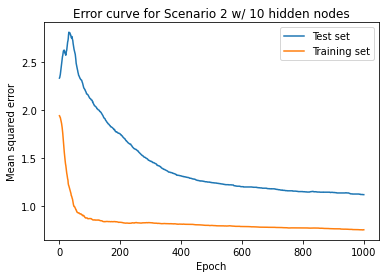

In [79]:
plot_error_curve(x, mean_test_errors, mean_train_errors, "Error curve for Scenario 2 w/ 10 hidden nodes")

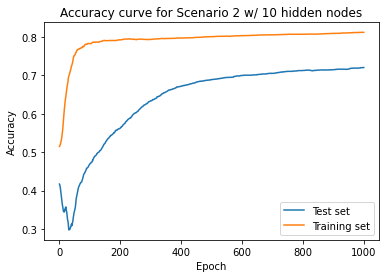

In [80]:
plot_accuracy_curve(x, mean_test_accuracies, mean_train_accuracies, "Accuracy curve for Scenario 2 w/ 10 hidden nodes")

In [81]:
x, mean_test_errors, mean_test_accuracies, mean_train_errors, mean_train_accuracies = \
learning_curves(sc2patternsTrain, sc2targetsTrain, sc2patternsTest, sc2targetsTest, 20)

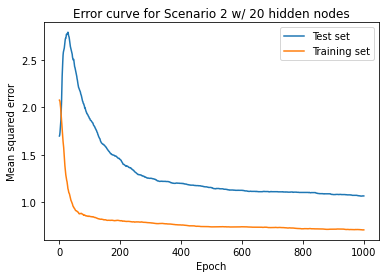

In [82]:
plot_error_curve(x, mean_test_errors, mean_train_errors, "Error curve for Scenario 2 w/ 20 hidden nodes")

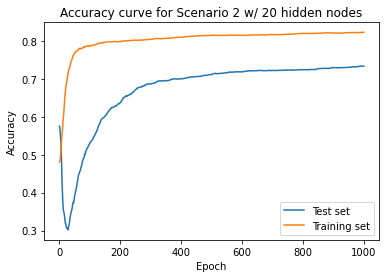

In [83]:
plot_accuracy_curve(x, mean_test_accuracies, mean_train_accuracies, "Accuracy curve for Scenario 2 w/ 20 hidden nodes")

In [84]:
x, mean_test_errors, mean_test_accuracies, mean_train_errors, mean_train_accuracies = \
learning_curves(sc2patternsTrain, sc2targetsTrain, sc2patternsTest, sc2targetsTest, 50)

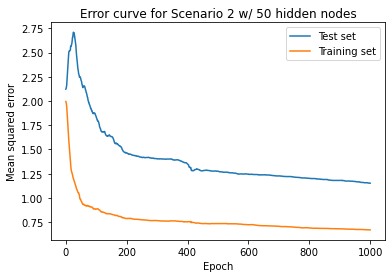

In [85]:
plot_error_curve(x, mean_test_errors, mean_train_errors, "Error curve for Scenario 2 w/ 50 hidden nodes")

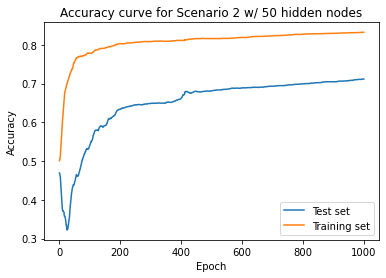

In [86]:
plot_accuracy_curve(x, mean_test_accuracies, mean_train_accuracies, "Accuracy curve for Scenario 2 w/ 50 hidden nodes")

Third scenario: random 50% from classB are removed

In [87]:
x, mean_test_errors, mean_test_accuracies, mean_train_errors, mean_train_accuracies = \
learning_curves(sc3patternsTrain, sc3targetsTrain, sc3patternsTest, sc3targetsTest, 10)

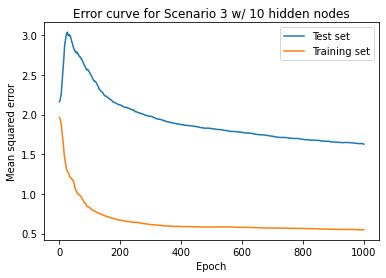

In [88]:
plot_error_curve(x, mean_test_errors, mean_train_errors, "Error curve for Scenario 3 w/ 10 hidden nodes")

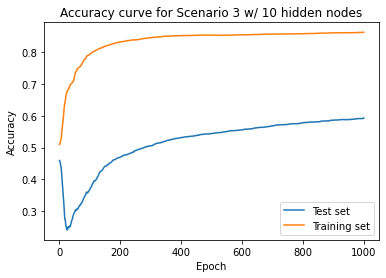

In [89]:
plot_accuracy_curve(x, mean_test_accuracies, mean_train_accuracies, "Accuracy curve for Scenario 3 w/ 10 hidden nodes")

In [90]:
x, mean_test_errors, mean_test_accuracies, mean_train_errors, mean_train_accuracies = \
learning_curves(sc3patternsTrain, sc3targetsTrain, sc3patternsTest, sc3targetsTest, 20)

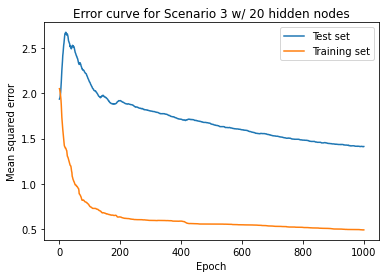

In [91]:
plot_error_curve(x, mean_test_errors, mean_train_errors, "Error curve for Scenario 3 w/ 20 hidden nodes")

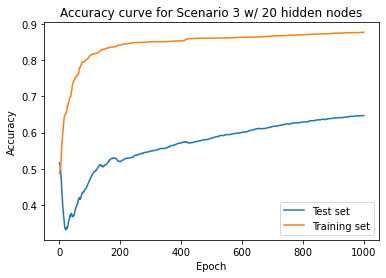

In [92]:
plot_accuracy_curve(x, mean_test_accuracies, mean_train_accuracies, "Accuracy curve for Scenario 3 w/ 20 hidden nodes")

In [93]:
x, mean_test_errors, mean_test_accuracies, mean_train_errors, mean_train_accuracies = \
learning_curves(sc3patternsTrain, sc3targetsTrain, sc3patternsTest, sc3targetsTest, 50)

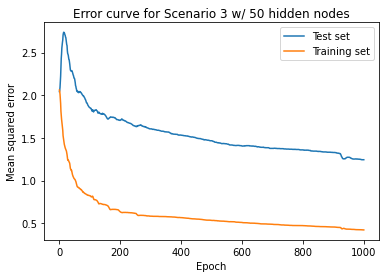

In [94]:
plot_error_curve(x, mean_test_errors, mean_train_errors, "Error curve for Scenario 3 w/ 50 hidden nodes")

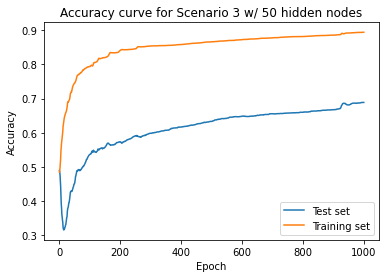

In [95]:
plot_accuracy_curve(x, mean_test_accuracies, mean_train_accuracies, "Accuracy curve for Scenario 3 w/ 50 hidden nodes")

Fourth scenario: 20% from a subset of classA for which classA(1,:)<0 and 80% from a subset of classA for which classA(1,:)>0

In [96]:
x, mean_test_errors, mean_test_accuracies, mean_train_errors, mean_train_accuracies = \
learning_curves(sc4patternsTrain, sc4targetsTrain, sc4patternsTest, sc4targetsTest, 10)

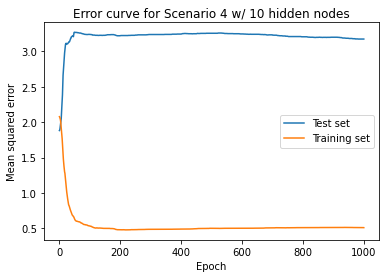

In [97]:
plot_error_curve(x, mean_test_errors, mean_train_errors, "Error curve for Scenario 4 w/ 10 hidden nodes")

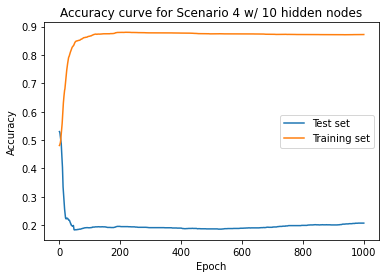

In [98]:
plot_accuracy_curve(x, mean_test_accuracies, mean_train_accuracies, "Accuracy curve for Scenario 4 w/ 10 hidden nodes")

In [99]:
x, mean_test_errors, mean_test_accuracies, mean_train_errors, mean_train_accuracies = \
learning_curves(sc4patternsTrain, sc4targetsTrain, sc4patternsTest, sc4targetsTest, 20)

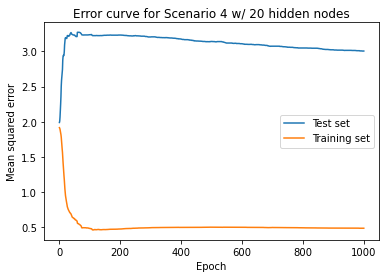

In [100]:
plot_error_curve(x, mean_test_errors, mean_train_errors, "Error curve for Scenario 4 w/ 20 hidden nodes")

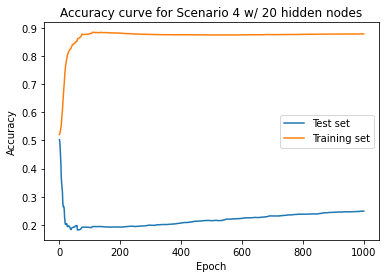

In [101]:
plot_accuracy_curve(x, mean_test_accuracies, mean_train_accuracies, "Accuracy curve for Scenario 4 w/ 20 hidden nodes")

In [102]:
x, mean_test_errors, mean_test_accuracies, mean_train_errors, mean_train_accuracies = \
learning_curves(sc4patternsTrain, sc4targetsTrain, sc4patternsTest, sc4targetsTest, 50)

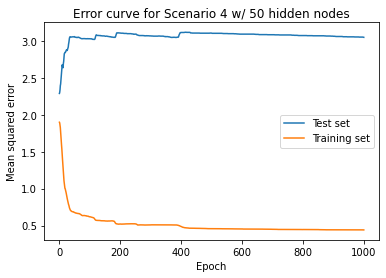

In [103]:
plot_error_curve(x, mean_test_errors, mean_train_errors, "Error curve for Scenario 4 w/ 50 hidden nodes")

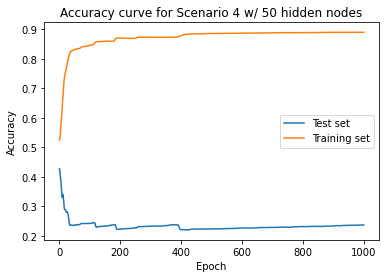

In [104]:
plot_accuracy_curve(x, mean_test_accuracies, mean_train_accuracies, "Accuracy curve for Scenario 4 w/ 50 hidden nodes")

**Question 2.3: Impact of batch/sequential learning on validation performance**

In [50]:
x, mean_test_errors, mean_test_accuracies, mean_train_errors, mean_train_accuracies = \
learning_curves(sc1patternsTrain, sc1targetsTrain, sc1patternsTest, sc1targetsTest, 50, sequential=True)

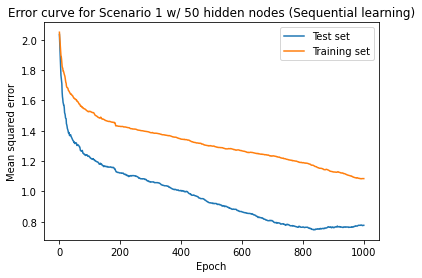

In [51]:
plot_error_curve(x, mean_test_errors, mean_train_errors, "Error curve for Scenario 1 w/ 50 hidden nodes (Sequential learning)")

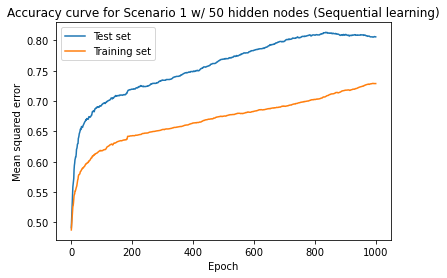

In [52]:
plot_error_curve(x, mean_test_accuracies, mean_train_accuracies, "Accuracy curve for Scenario 1 w/ 50 hidden nodes (Sequential learning)")

In [53]:
x, mean_test_errors, mean_test_accuracies, mean_train_errors, mean_train_accuracies = \
learning_curves(sc1patternsTrain, sc1targetsTrain, sc1patternsTest, sc1targetsTest, 50, sequential=False)

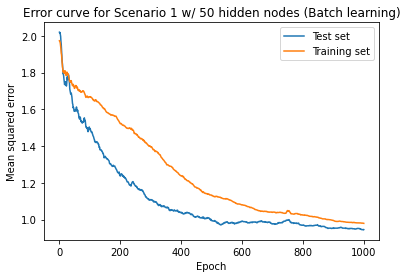

In [54]:
plot_error_curve(x, mean_test_errors, mean_train_errors, "Error curve for Scenario 1 w/ 50 hidden nodes (Batch learning)")

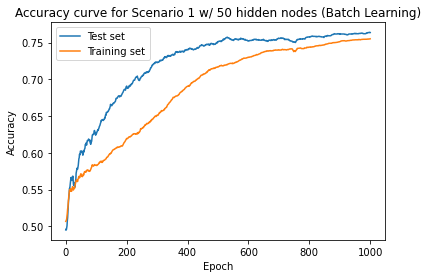

In [55]:
plot_accuracy_curve(x, mean_test_accuracies, mean_train_accuracies, "Accuracy curve for Scenario 1 w/ 50 hidden nodes (Batch Learning)")

**Question 2.4: Approximate the resulting decision boundary**

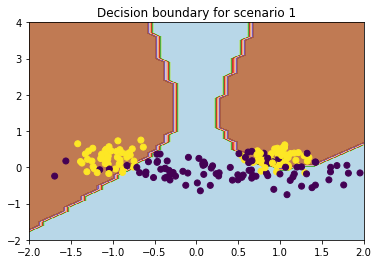

In [109]:
model = TwoLayerPerceptron(2, 1, num_hidden_nodes=50)
model.train(sc1patternsTrain, sc1targetsTrain, epochs=2000)

data = np.concatenate((sc1patternsTrain, sc1patternsTest), axis=1)
targets = np.concatenate((sc1targetsTrain, sc1targetsTest))

xx, yy = np.meshgrid(np.arange(-2, 2.1, 0.1),np.arange(-2, 4.1, 0.1))
grid_data = np.transpose(np.c_[xx.ravel(), yy.ravel()])
Z = np.sign(model.predict(grid_data))[0]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(data[0], data[1], c=targets)
plt.axis([-2,2,-2,4])
plt.title("Decision boundary for scenario 1")
plt.show()

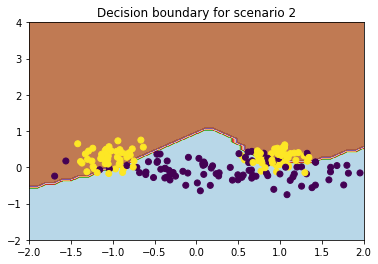

In [110]:
model = TwoLayerPerceptron(2, 1, num_hidden_nodes=50)
model.train(sc2patternsTrain, sc2targetsTrain, epochs=2000)

data = np.concatenate((sc2patternsTrain, sc2patternsTest), axis=1)
targets = np.concatenate((sc2targetsTrain, sc2targetsTest))

xx, yy = np.meshgrid(np.arange(-5, 2.1, 0.1),np.arange(-2, 4.1, 0.1))
grid_data = np.transpose(np.c_[xx.ravel(), yy.ravel()])
Z = np.sign(model.predict(grid_data))[0]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(data[0], data[1], c=targets)
plt.axis([-2,2,-2,4])
plt.title("Decision boundary for scenario 2")
plt.show()

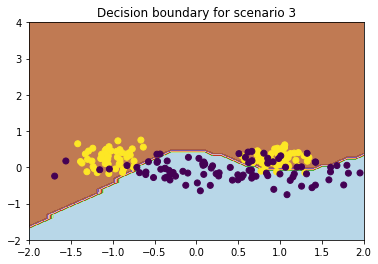

In [111]:
model = TwoLayerPerceptron(2, 1, num_hidden_nodes=50)
model.train(sc3patternsTrain, sc3targetsTrain, epochs=2000)

data = np.concatenate((sc3patternsTrain, sc3patternsTest), axis=1)
targets = np.concatenate((sc3targetsTrain, sc3targetsTest))

xx, yy = np.meshgrid(np.arange(-5, 2.1, 0.1),np.arange(-2, 4.1, 0.1))
grid_data = np.transpose(np.c_[xx.ravel(), yy.ravel()])
Z = np.sign(model.predict(grid_data))[0]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(data[0], data[1], c=targets)
plt.axis([-2,2,-2,4])
plt.title("Decision boundary for scenario 3")
plt.show()

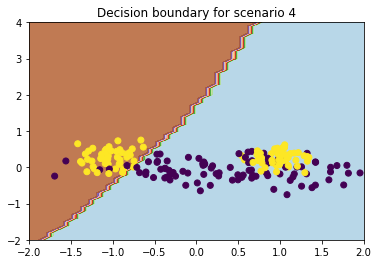

In [112]:
model = TwoLayerPerceptron(2, 1, num_hidden_nodes=50)
model.train(sc4patternsTrain, sc2targetsTrain, epochs=2000)

data = np.concatenate((sc4patternsTrain, sc4patternsTest), axis=1)
targets = np.concatenate((sc4targetsTrain, sc4targetsTest))

xx, yy = np.meshgrid(np.arange(-5, 2.1, 0.1),np.arange(-2, 4.1, 0.1))
grid_data = np.transpose(np.c_[xx.ravel(), yy.ravel()])
Z = np.sign(model.predict(grid_data))[0]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(data[0], data[1], c=targets)
plt.axis([-2,2,-2,4])
plt.title("Decision boundary for scenario 4")
plt.show()

## Function approximation
Approximate a function using a two-layer perceptron

In [217]:
def f(x,y):
    return np.exp(-(x**2 + y**2) / 10) - 0.5

In [218]:
def plotGaussianBell3D(x, y, z, title):
    ax = plt.axes(projection='3d')
    ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')
    plt.title(title)
    plt.show()

In [219]:
x = np.arange(-5,5,0.5)
y = np.arange(-5,5,0.5)
xx, yy = np.meshgrid(x, y)
z = f(xx, yy)

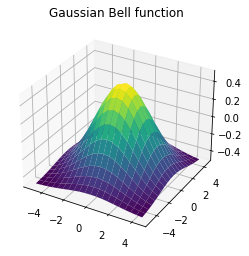

In [220]:
plotGaussianBell3D(xx, yy, z, "Gaussian Bell function")

**Train the network and visualise the approximated function**

In [221]:
gridsize = len(xx)
n = gridsize**2
targets = z.reshape(1, n)
patterns = np.concatenate((np.reshape(xx, (1, n)), np.reshape(yy, (1, n))), axis=0)

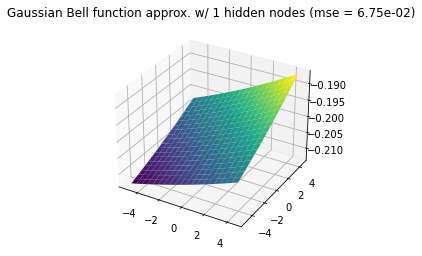

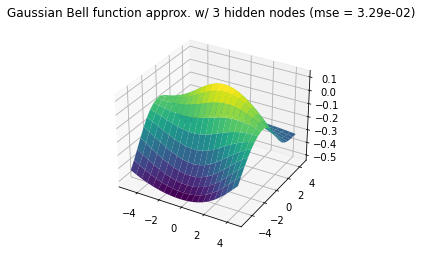

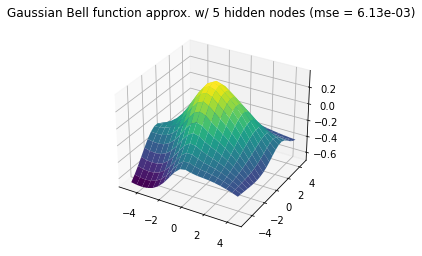

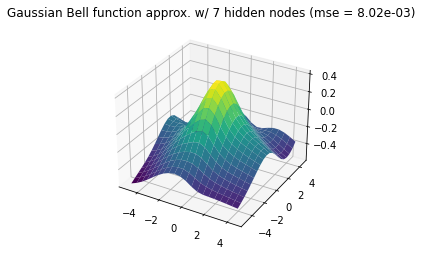

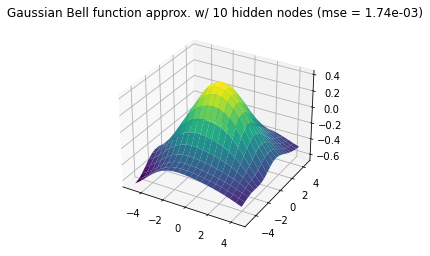

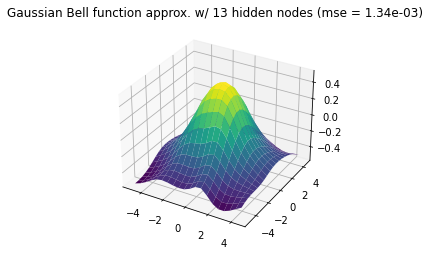

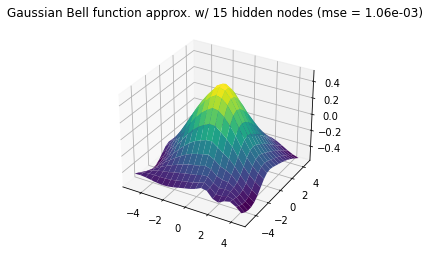

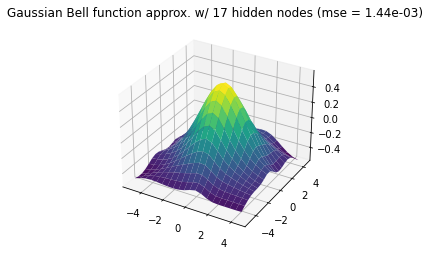

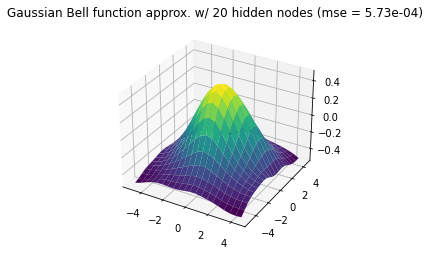

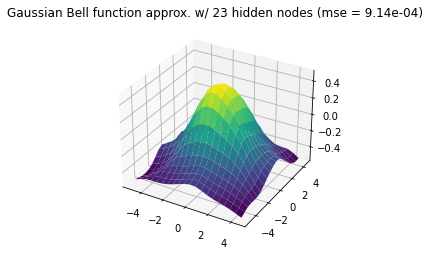

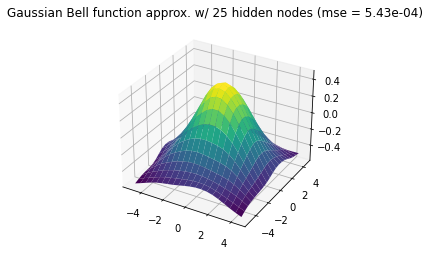

In [222]:
hns = [1,3,5,7,10,13,15,17,20,23,25]
mean_errors = []
stds_errors = []

for hn in hns:
    errors = []
    for i in range(50):
        model = TwoLayerPerceptron(2, 1, num_hidden_nodes=hn)
        model.train(patterns, targets, epochs=1000)
        predictions = model.predict(patterns)[0]
        errors += [mse(predictions, targets)]
        
    mean_errors += [np.mean(errors)]
    stds_errors += [np.std(errors)]
    plotGaussianBell3D(xx, yy, predictions.reshape(gridsize,gridsize), "Gaussian Bell function approx. w/ " + \
                          str(hn) + " hidden nodes (mse = %.2e)" % mse(predictions, targets))

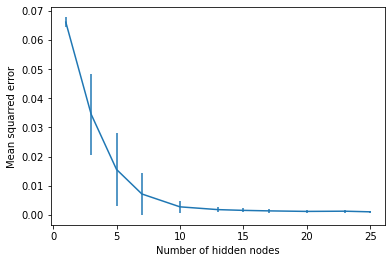

In [223]:
plt.errorbar(hns, mean_errors, stds_errors)
plt.xlabel("Number of hidden nodes")
plt.ylabel("Mean squarred error")
plt.show()

Experiment varying number of training samples

In [224]:
def split_data(patterns, targets, ratio):
    idxs = np.random.permutation(patterns.shape[1])
    train_idx = idxs[:int(ratio*len(idxs))]
    train_patterns, train_targets = patterns[:,train_idx], targets[:, train_idx]
    return train_patterns, train_targets

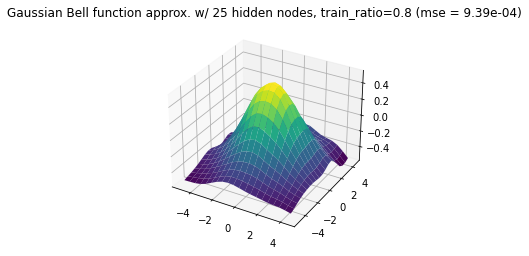

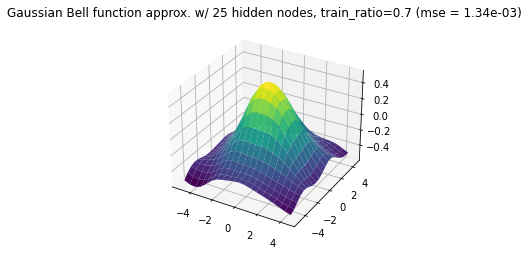

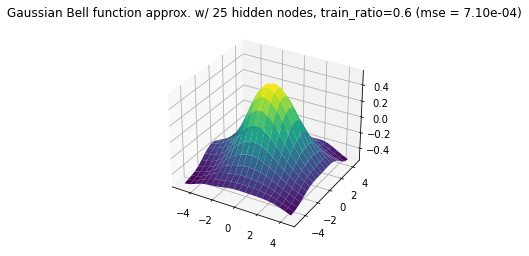

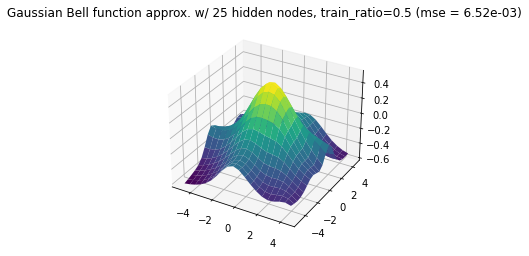

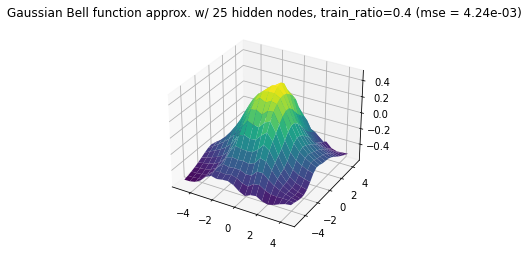

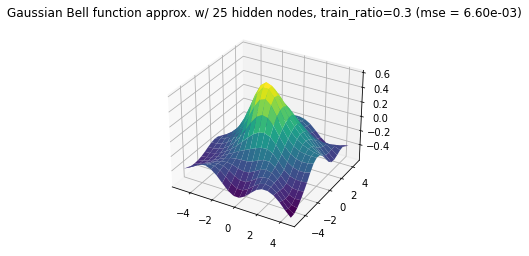

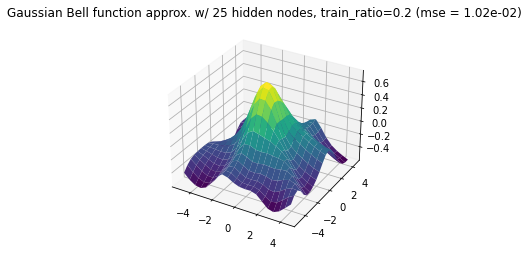

In [230]:
ratios = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]
mean_errors = []
stds_errors = []

for ratio in ratios:
    errors = []
    for i in range(50):
        train_patterns, train_targets = split_data(patterns, targets, ratio)
        model = TwoLayerPerceptron(2, 1, num_hidden_nodes=25)
        model.train(train_patterns, train_targets, epochs=1000)
        predictions = model.predict(patterns)[0]
        errors += [mse(predictions, targets)]
        
    mean_errors += [np.mean(errors)]
    stds_errors += [np.std(errors)]
    plotGaussianBell3D(xx, yy, predictions.reshape(gridsize,gridsize), "Gaussian Bell function approx. w/ " + \
                                        str(25) + " hidden nodes, train_ratio=" + str(ratio) + " (mse = %.2e)" % mse(predictions, targets))

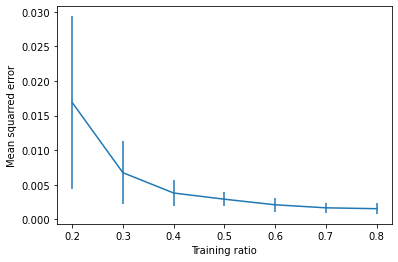

In [231]:
plt.errorbar(ratios, mean_errors, stds_errors)
plt.xlabel("Training ratio")
plt.ylabel("Mean squarred error")
plt.show()

Experiment different learning rates

<ipython-input-4-be907cdbdc8a>:18: RuntimeWarning: overflow encountered in exp
  hout = 2 / (1 + np.exp(-hin)) - 1
<ipython-input-4-be907cdbdc8a>:23: RuntimeWarning: overflow encountered in exp
  out = 2 / (1 + np.exp(-oin)) - 1
<ipython-input-4-be907cdbdc8a>:51: RuntimeWarning: overflow encountered in exp
  hout = 2 / (1 + np.exp(-hin)) - 1
<ipython-input-4-be907cdbdc8a>:56: RuntimeWarning: overflow encountered in exp
  out = 2 / (1 + np.exp(-oin)) - 1


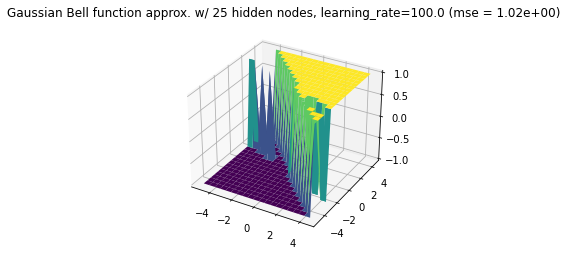

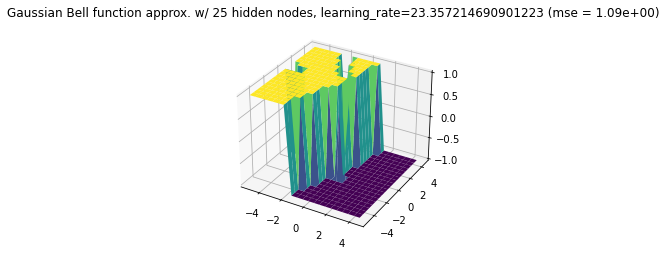

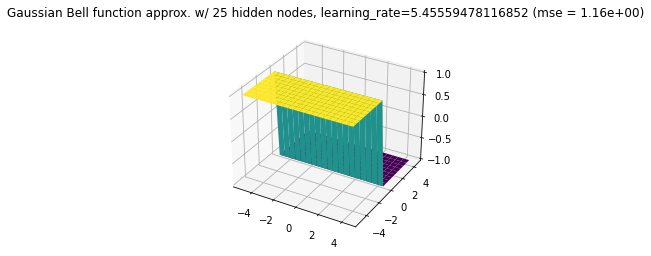

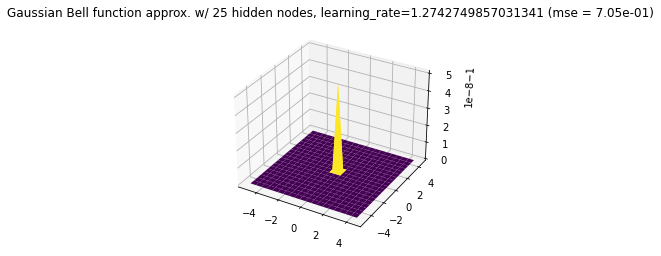

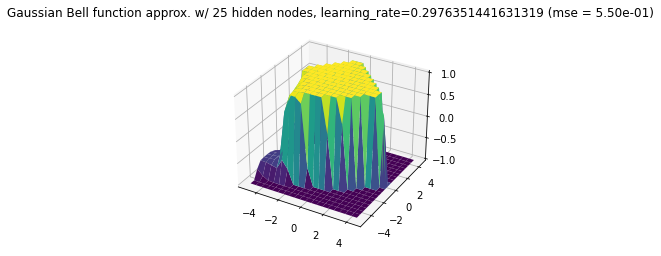

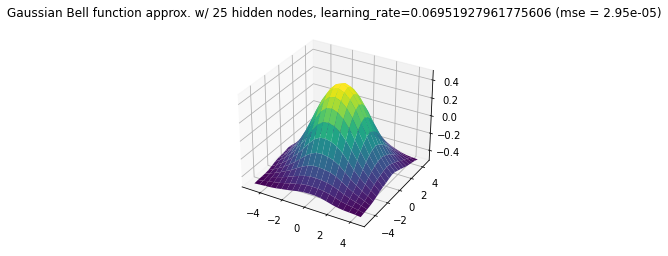

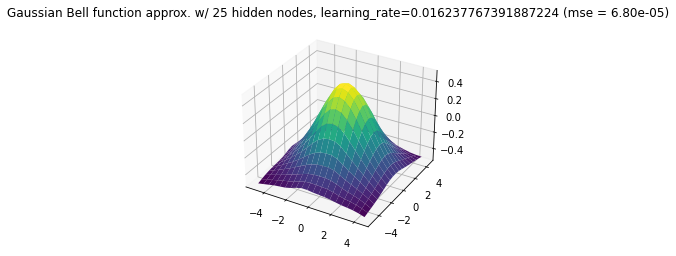

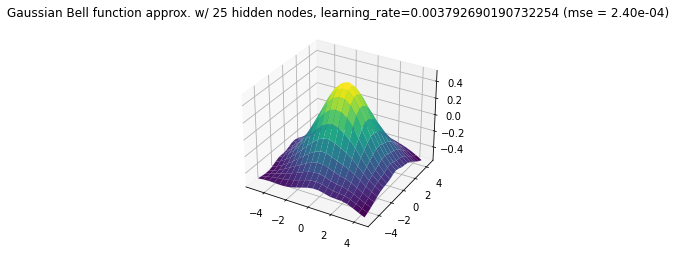

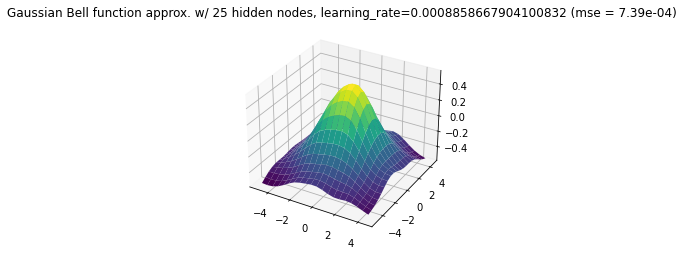

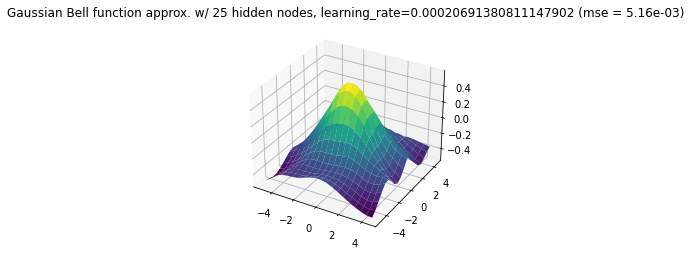

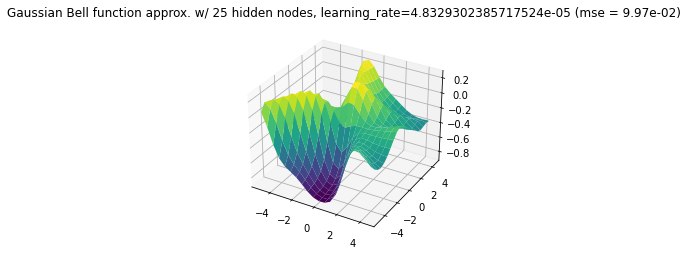

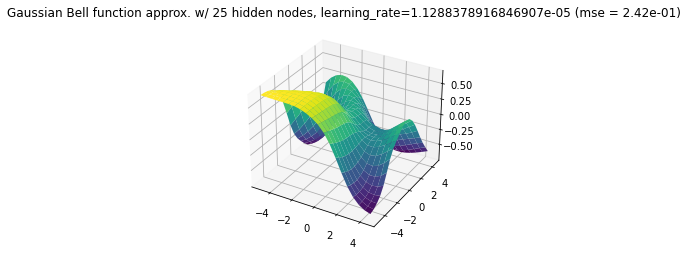

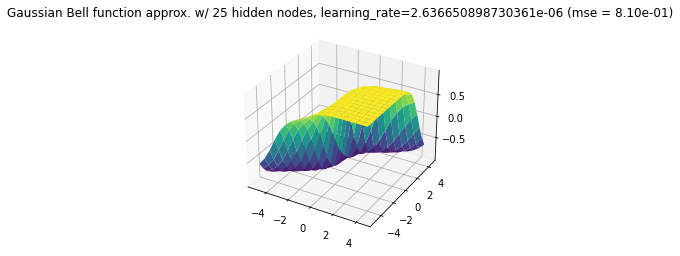

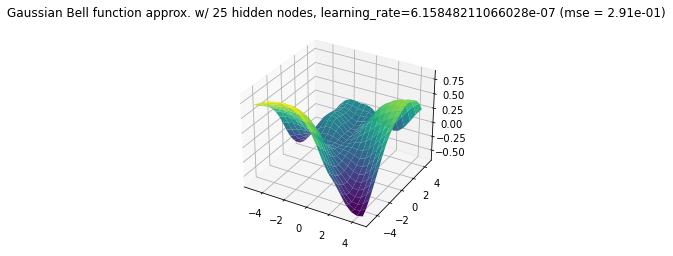

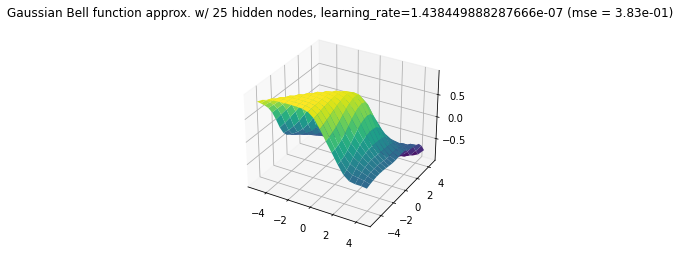

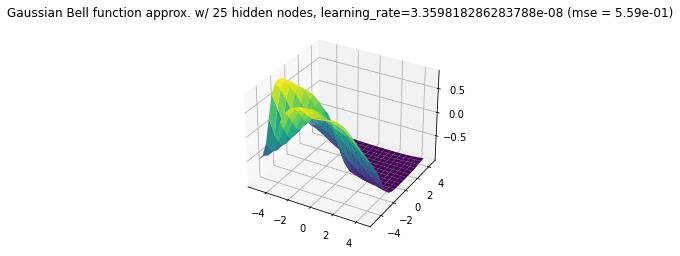

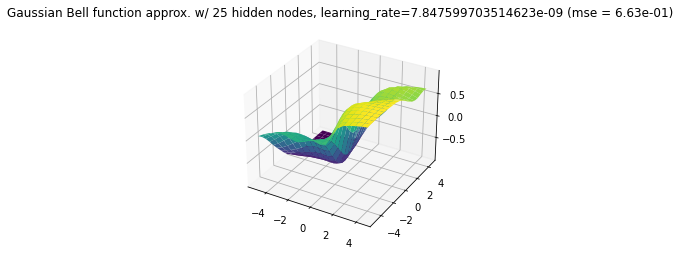

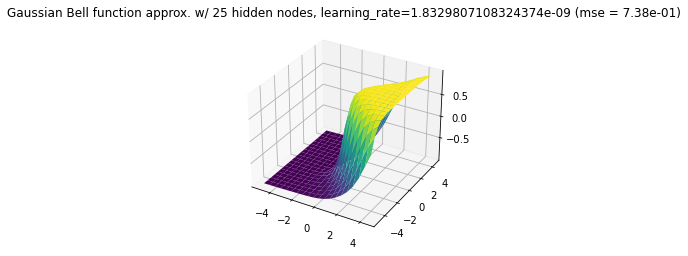

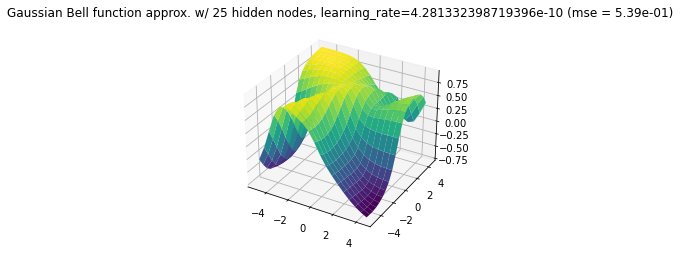

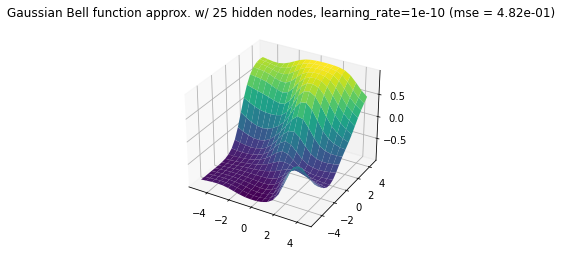

In [227]:
lrs = np.logspace(2,-10,20)
mean_errors = []
stds_errors = []

for lr in lrs:
    errors = []
    for i in range(50):
        model = TwoLayerPerceptron(2, 1, num_hidden_nodes=25, learning_rate=lr)
        model.train(patterns, targets, epochs=1000)
        predictions = model.predict(patterns)[0]
        errors += [mse(predictions, targets)]
    
    mean_errors += [np.mean(errors)]
    stds_errors += [np.std(errors)]
    plotGaussianBell3D(xx, yy, predictions.reshape(gridsize,gridsize), "Gaussian Bell function approx. w/ " + \
                                        str(25) + " hidden nodes, learning_rate=" + str(lr) + " (mse = %.2e)" % mse(predictions, targets))

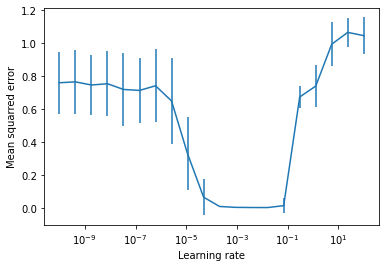

In [228]:
plt.errorbar(lrs, mean_errors, stds_errors)
plt.xlabel("Learning rate")
plt.xscale('log')
plt.ylabel("Mean squarred error")
plt.show()